# Experimentation of KNN

In [1]:
!python -m pip install session_rec_introml

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import numpy as np
from model import Knn, ItemKnn
from data import DataManipulation
from evaluation.EvaluationMetric import mean_reciprocal_rank, hit_rate
import time
from sklearn.model_selection import LeaveOneOut



## load Data and initialization

In [2]:
data_manip = DataManipulation()
data = pd.read_csv("../sigir_train_full.txt")

data_train, data_test, _ = data_manip.train_test_split(data, None, 0.25)
max_item = np.max(pd.unique(data["ItemId"]))


train size was modified real train session size is None


## ItemKNN Test

100%|██████████| 1898/1898 [00:01<00:00, 1551.06it/s]


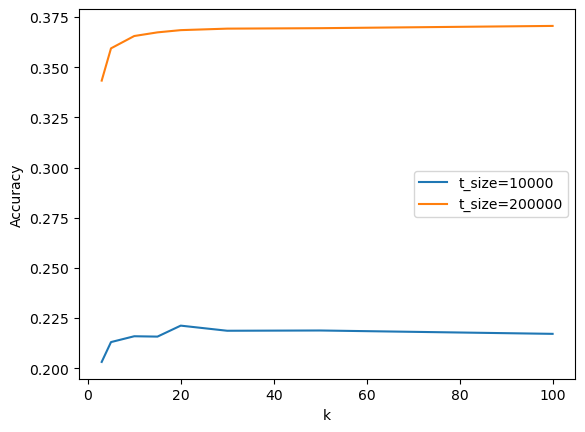

In [4]:
predictors = [ItemKnn(5, max_item + 1)]
training_size = [10000, 200000, 500000, 1000000]
training_size = [10000, 200000]
accuracy = dict()
mrr_accuracy = dict()
k_values = [3, 5, 10, 15, 20, 30, 50, 100]
# k_values = [3]
test_size = 10000

for prd in predictors:
    for train_size in training_size:
        # train_set, test_set = train_test_split(data,test_size=test_size,train_size=train_size)
        accuracy[train_size] = []
        mrr_accuracy[train_size] = []
        train_set = data[:train_size]
        test_set = data[train_size : train_size + test_size]
        max_item = np.max(pd.unique(train_set["ItemId"]))
        prd._max_item_id = max_item + 1
        prd.fit(train_set)
        test_set, test_target = data_manip.prepare_data_for_test(test_set)
        for k in k_values:
            prd._k = k
            accuracy[train_size].append(prd.score(test_set, test_target))
            mrr_accuracy[train_size].append(prd.mrr_score(test_set, test_target))


pyplot.figure()
for size in training_size:
    pyplot.plot(k_values, mrr_accuracy[size], label=f"t_size={size}")
pyplot.xlabel("k")
pyplot.ylabel("Accuracy")
pyplot.legend()
pyplot.show()

In [ ]:
k_values = [3, 11, 25, 35, 75]
prediction_numbers = [5,10,20]
scores = [[],[],[]]
count_p = 0
data_train_fine, _, _ = data_manip.train_test_split(data_train, 80000, None)
for p_numbers in prediction_numbers:
    
    for k in k_values:

        knn = Knn(k, max_item + 1, p_numbers)

        count = 0
        train_acc, valid_acc = 0, 0
        for train_d, train_t in data_manip.kFold_split(data_train_fine, 5):
            print(f"train_d size : {train_d.shape}")
            print(f"train_t size : {train_t.shape}")
            knn.fit(train_d)
            print(f"knn k : {knn._k}")

            test_set, test_target = data_manip.prepare_data_for_test(train_t)
            y_hat = knn.predict(test_set)
            valid_acc += mean_reciprocal_rank(y_hat, test_target)
            # valid_acc += knn.mrr_score(test_set, test_target)
            count += 1
        scores[count_p].append(valid_acc/count)
    count_p += 1

fig = pyplot.figure()
ax = fig.add_subplot(111)

ax.set_title('Session - K_nn avec des nombres de prédictions différents')  # À modifier / to be modified
ax.plot(k_values, scores[0], 'r--', label=f"Nombre de prédictions : {prediction_numbers[0]}") # À compléter / to be completed
ax.plot(k_values, scores[1], 'b--', label=f"Nombre de prédictions : {prediction_numbers[1]}") # À compléter / to be completed
ax.plot(k_values, scores[2], 'y--', label=f"Nombre de prédictions : {prediction_numbers[2]}")
ax.set_xticks(k_values, k_values)
ax.grid(axis='x')
ax.set_xlabel("Values of K")
ax.set_ylabel("MRR")
pyplot.legend()
pyplot.show()

### SKNN Tests

Le but de cette expérience est de présenter les résultats de l'algorithmo session based Knn pou rl'apprentissage des recommandations à partir de l'algorithme Knn basé sur une session. Cette méthode Session Based Knn se base sur l'ensemble des actions de l'utilisateur actuelle et considère les k-sessions apprises les plus similaires. C'est ainsi qu'étant donné une session s, un ensemble de K sessions  voisines et une fonction de similarité retournant le score de similarité entre les différentes sessionsvoisines et la la session à évaluer 

train size was modified real train session size is 80000
train_d size : (34312, 3)
train_t size : (8317, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6402/6402 [00:01<00:00, 3208.32it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1625/1625 [00:00<00:00, 4140.54it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1625/1625 [00:00<00:00, 4958.06it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (34398, 3)
train_t size : (8231, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6414/6414 [00:01<00:00, 4791.86it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1613/1613 [00:00<00:00, 5142.25it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1613/1613 [00:00<00:00, 4910.35it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (33532, 3)
train_t size : (9097, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6365/6365 [00:01<00:00, 4164.12it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1662/1662 [00:00<00:00, 5514.50it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1662/1662 [00:00<00:00, 4698.60it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (33890, 3)
train_t size : (8739, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6420/6420 [00:01<00:00, 4182.52it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1607/1607 [00:00<00:00, 9703.73it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1607/1607 [00:00<00:00, 5192.94it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (34384, 3)
train_t size : (8245, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6507/6507 [00:01<00:00, 4484.38it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1520/1520 [00:00<00:00, 9816.16it/s] 
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1520/1520 [00:00<00:00, 5203.19it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (34254, 3)
train_t size : (8375, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6457/6457 [00:01<00:00, 4505.60it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1570/1570 [00:00<00:00, 8680.76it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1570/1570 [00:00<00:00, 4197.73it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (34034, 3)
train_t size : (8595, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6416/6416 [00:01<00:00, 3943.66it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1611/1611 [00:00<00:00, 12203.62it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1611/1611 [00:00<00:00, 5479.60it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (34228, 3)
train_t size : (8401, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6432/6432 [00:01<00:00, 3704.49it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1595/1595 [00:00<00:00, 10803.79it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1595/1595 [00:00<00:00, 5319.31it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (33876, 3)
train_t size : (8753, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6444/6444 [00:01<00:00, 5129.19it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1583/1583 [00:00<00:00, 6328.98it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1583/1583 [00:00<00:00, 5624.99it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (34124, 3)
train_t size : (8505, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6359/6359 [00:02<00:00, 3026.22it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1668/1668 [00:00<00:00, 4137.61it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1668/1668 [00:00<00:00, 3132.55it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (34225, 3)
train_t size : (8404, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6464/6464 [00:01<00:00, 3239.69it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1563/1563 [00:00<00:00, 4246.51it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1563/1563 [00:00<00:00, 4238.94it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (34556, 3)
train_t size : (8073, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6463/6463 [00:01<00:00, 4738.38it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1564/1564 [00:00<00:00, 10609.90it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1564/1564 [00:00<00:00, 5296.88it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (33826, 3)
train_t size : (8803, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6381/6381 [00:01<00:00, 5114.01it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1646/1646 [00:00<00:00, 10062.75it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1646/1646 [00:00<00:00, 3984.41it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (33680, 3)
train_t size : (8949, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6365/6365 [00:01<00:00, 4159.39it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1662/1662 [00:00<00:00, 11639.39it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1662/1662 [00:00<00:00, 4091.97it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (34229, 3)
train_t size : (8400, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6435/6435 [00:01<00:00, 4539.15it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1592/1592 [00:00<00:00, 11303.91it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1592/1592 [00:00<00:00, 4803.55it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (34190, 3)
train_t size : (8439, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6416/6416 [00:01<00:00, 4359.52it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1611/1611 [00:00<00:00, 9770.56it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1611/1611 [00:00<00:00, 4486.82it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (34228, 3)
train_t size : (8401, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6408/6408 [00:01<00:00, 3489.47it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1619/1619 [00:00<00:00, 10066.59it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1619/1619 [00:00<00:00, 4960.64it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (34333, 3)
train_t size : (8296, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6502/6502 [00:01<00:00, 4628.45it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1525/1525 [00:00<00:00, 5942.56it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1525/1525 [00:00<00:00, 5595.71it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (33827, 3)
train_t size : (8802, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6418/6418 [00:01<00:00, 4577.44it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1609/1609 [00:00<00:00, 4940.97it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1609/1609 [00:00<00:00, 4790.46it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (33938, 3)
train_t size : (8691, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6364/6364 [00:02<00:00, 2819.70it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1663/1663 [00:00<00:00, 5769.91it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1663/1663 [00:00<00:00, 4415.72it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (33677, 3)
train_t size : (8952, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6346/6346 [00:01<00:00, 4587.72it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1681/1681 [00:00<00:00, 5850.14it/s] 
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1681/1681 [00:00<00:00, 5094.80it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (34431, 3)
train_t size : (8198, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6443/6443 [00:01<00:00, 4811.77it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1584/1584 [00:00<00:00, 7918.41it/s] 
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1584/1584 [00:00<00:00, 5308.84it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (33721, 3)
train_t size : (8908, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6411/6411 [00:01<00:00, 4111.91it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1616/1616 [00:00<00:00, 10306.50it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1616/1616 [00:00<00:00, 5425.78it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (34163, 3)
train_t size : (8466, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6444/6444 [00:01<00:00, 4429.92it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1583/1583 [00:00<00:00, 9119.13it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1583/1583 [00:00<00:00, 3465.34it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (34524, 3)
train_t size : (8105, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6464/6464 [00:01<00:00, 4526.67it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1563/1563 [00:00<00:00, 8956.64it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1563/1563 [00:00<00:00, 3407.41it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (34094, 3)
train_t size : (8535, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6434/6434 [00:01<00:00, 4423.53it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1593/1593 [00:00<00:00, 12233.93it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1593/1593 [00:00<00:00, 5070.24it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (33749, 3)
train_t size : (8880, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6376/6376 [00:01<00:00, 4650.20it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1651/1651 [00:00<00:00, 5937.40it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1651/1651 [00:00<00:00, 4683.15it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (33963, 3)
train_t size : (8666, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6391/6391 [00:01<00:00, 4436.40it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1636/1636 [00:00<00:00, 4961.63it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1636/1636 [00:00<00:00, 4059.33it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (34187, 3)
train_t size : (8442, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6432/6432 [00:01<00:00, 4119.94it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1595/1595 [00:00<00:00, 5834.99it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1595/1595 [00:00<00:00, 5001.21it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (34523, 3)
train_t size : (8106, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6475/6475 [00:01<00:00, 4553.66it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1552/1552 [00:00<00:00, 8846.28it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1552/1552 [00:00<00:00, 3799.75it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (34141, 3)
train_t size : (8488, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6432/6432 [00:01<00:00, 4157.59it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1595/1595 [00:00<00:00, 9705.60it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1595/1595 [00:00<00:00, 5371.71it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (33702, 3)
train_t size : (8927, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6395/6395 [00:01<00:00, 4773.46it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1632/1632 [00:00<00:00, 9771.35it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1632/1632 [00:00<00:00, 4318.24it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (34465, 3)
train_t size : (8164, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6479/6479 [00:01<00:00, 4979.67it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1548/1548 [00:00<00:00, 10669.81it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1548/1548 [00:00<00:00, 4926.12it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (34497, 3)
train_t size : (8132, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6417/6417 [00:01<00:00, 4695.96it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1610/1610 [00:00<00:00, 11370.93it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1610/1610 [00:00<00:00, 5056.99it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (33711, 3)
train_t size : (8918, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6385/6385 [00:01<00:00, 4914.16it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1642/1642 [00:00<00:00, 10448.23it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1642/1642 [00:00<00:00, 4416.94it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (34162, 3)
train_t size : (8467, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6428/6428 [00:01<00:00, 3294.87it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1599/1599 [00:00<00:00, 4381.00it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1599/1599 [00:00<00:00, 2870.49it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (34153, 3)
train_t size : (8476, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6402/6402 [00:01<00:00, 4556.99it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1625/1625 [00:00<00:00, 5723.90it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1625/1625 [00:00<00:00, 4700.78it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (34496, 3)
train_t size : (8133, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6498/6498 [00:01<00:00, 4203.35it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1529/1529 [00:00<00:00, 5289.45it/s] 
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1529/1529 [00:00<00:00, 4866.85it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (33973, 3)
train_t size : (8656, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6411/6411 [00:01<00:00, 5798.26it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1616/1616 [00:00<00:00, 13856.34it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1616/1616 [00:00<00:00, 6300.40it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (33732, 3)
train_t size : (8897, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6369/6369 [00:01<00:00, 5679.73it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1658/1658 [00:00<00:00, 14925.07it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1658/1658 [00:00<00:00, 6447.06it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (33747, 3)
train_t size : (8882, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6375/6375 [00:01<00:00, 5696.28it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1652/1652 [00:00<00:00, 13164.83it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1652/1652 [00:00<00:00, 6569.99it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (33436, 3)
train_t size : (9193, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6396/6396 [00:01<00:00, 5485.74it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1631/1631 [00:00<00:00, 10384.54it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1631/1631 [00:00<00:00, 4571.92it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (34545, 3)
train_t size : (8084, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6446/6446 [00:01<00:00, 5878.28it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1581/1581 [00:00<00:00, 12567.74it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1581/1581 [00:00<00:00, 6593.69it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (34434, 3)
train_t size : (8195, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6465/6465 [00:01<00:00, 5881.54it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1562/1562 [00:00<00:00, 12504.49it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1562/1562 [00:00<00:00, 6225.06it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (34354, 3)
train_t size : (8275, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6426/6426 [00:01<00:00, 5640.44it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1601/1601 [00:00<00:00, 5601.98it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1601/1601 [00:00<00:00, 5998.48it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (34233, 3)
train_t size : (8396, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6432/6432 [00:01<00:00, 5540.28it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1595/1595 [00:00<00:00, 6768.83it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1595/1595 [00:00<00:00, 6347.55it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (34117, 3)
train_t size : (8512, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6423/6423 [00:01<00:00, 5681.45it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1604/1604 [00:00<00:00, 6697.24it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1604/1604 [00:00<00:00, 6009.28it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (33862, 3)
train_t size : (8767, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6445/6445 [00:01<00:00, 5673.30it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1582/1582 [00:00<00:00, 7369.13it/s] 
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1582/1582 [00:00<00:00, 6496.56it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (34014, 3)
train_t size : (8615, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6414/6414 [00:01<00:00, 5816.60it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1613/1613 [00:00<00:00, 12854.38it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1613/1613 [00:00<00:00, 4886.51it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (34290, 3)
train_t size : (8339, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6394/6394 [00:01<00:00, 6050.52it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1633/1633 [00:00<00:00, 14859.99it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1633/1633 [00:00<00:00, 6499.38it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (33614, 3)
train_t size : (9015, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6358/6358 [00:01<00:00, 6044.45it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1669/1669 [00:00<00:00, 15188.84it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1669/1669 [00:00<00:00, 6522.43it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (34032, 3)
train_t size : (8597, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6419/6419 [00:01<00:00, 5654.93it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1608/1608 [00:00<00:00, 14639.87it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1608/1608 [00:00<00:00, 5889.68it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (34279, 3)
train_t size : (8350, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6431/6431 [00:01<00:00, 5661.61it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1596/1596 [00:00<00:00, 12717.84it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1596/1596 [00:00<00:00, 5980.28it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (34121, 3)
train_t size : (8508, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6431/6431 [00:01<00:00, 6113.78it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1596/1596 [00:00<00:00, 7263.06it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1596/1596 [00:00<00:00, 6239.10it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (34470, 3)
train_t size : (8159, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6469/6469 [00:01<00:00, 5968.94it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1558/1558 [00:00<00:00, 7088.36it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1558/1558 [00:00<00:00, 6211.59it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (33829, 3)
train_t size : (8800, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6426/6426 [00:01<00:00, 5763.16it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1601/1601 [00:00<00:00, 6671.46it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1601/1601 [00:00<00:00, 5995.21it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (34348, 3)
train_t size : (8281, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6460/6460 [00:01<00:00, 5771.46it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1567/1567 [00:00<00:00, 7119.13it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1567/1567 [00:00<00:00, 6232.94it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (33777, 3)
train_t size : (8852, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6385/6385 [00:01<00:00, 5786.41it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1642/1642 [00:00<00:00, 6717.43it/s] 
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1642/1642 [00:00<00:00, 6147.97it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (34236, 3)
train_t size : (8393, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6424/6424 [00:01<00:00, 5681.03it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1603/1603 [00:00<00:00, 12754.38it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1603/1603 [00:00<00:00, 6391.63it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (34326, 3)
train_t size : (8303, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6413/6413 [00:01<00:00, 4667.45it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1614/1614 [00:00<00:00, 11414.71it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1614/1614 [00:00<00:00, 5997.89it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (33740, 3)
train_t size : (8889, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6422/6422 [00:01<00:00, 5740.99it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1605/1605 [00:00<00:00, 12742.68it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1605/1605 [00:00<00:00, 6173.43it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (34260, 3)
train_t size : (8369, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6434/6434 [00:01<00:00, 5918.21it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1593/1593 [00:00<00:00, 12650.12it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1593/1593 [00:00<00:00, 5964.13it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (34253, 3)
train_t size : (8376, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6416/6416 [00:01<00:00, 5265.80it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1611/1611 [00:00<00:00, 12827.91it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1611/1611 [00:00<00:00, 6030.91it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (33799, 3)
train_t size : (8830, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6369/6369 [00:01<00:00, 5626.48it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1658/1658 [00:00<00:00, 6920.12it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1658/1658 [00:00<00:00, 6189.31it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (34464, 3)
train_t size : (8165, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6467/6467 [00:01<00:00, 5624.77it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1560/1560 [00:00<00:00, 7115.53it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1560/1560 [00:00<00:00, 6217.08it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (34130, 3)
train_t size : (8499, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6391/6391 [00:02<00:00, 2996.89it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1636/1636 [00:00<00:00, 4471.65it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1636/1636 [00:00<00:00, 4719.90it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (33767, 3)
train_t size : (8862, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6419/6419 [00:02<00:00, 3094.04it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1608/1608 [00:00<00:00, 4697.59it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1608/1608 [00:00<00:00, 4558.72it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (33571, 3)
train_t size : (9058, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6351/6351 [00:01<00:00, 3981.10it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1676/1676 [00:00<00:00, 5572.55it/s] 
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1676/1676 [00:00<00:00, 5023.65it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (34355, 3)
train_t size : (8274, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6460/6460 [00:01<00:00, 3749.51it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1567/1567 [00:00<00:00, 9830.62it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1567/1567 [00:00<00:00, 4945.47it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (34693, 3)
train_t size : (7936, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6487/6487 [00:01<00:00, 4731.97it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1540/1540 [00:00<00:00, 11324.89it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1540/1540 [00:00<00:00, 4963.11it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (34139, 3)
train_t size : (8490, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6440/6440 [00:01<00:00, 3851.92it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1587/1587 [00:00<00:00, 9270.08it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1587/1587 [00:00<00:00, 4556.83it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (34523, 3)
train_t size : (8106, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6501/6501 [00:01<00:00, 4336.57it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1526/1526 [00:00<00:00, 9118.43it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1526/1526 [00:00<00:00, 4466.06it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (34429, 3)
train_t size : (8200, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6424/6424 [00:01<00:00, 5332.10it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1603/1603 [00:00<00:00, 12167.22it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1603/1603 [00:00<00:00, 5946.28it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (33556, 3)
train_t size : (9073, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6370/6370 [00:01<00:00, 4653.41it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1657/1657 [00:00<00:00, 7009.11it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1657/1657 [00:00<00:00, 5700.04it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (33869, 3)
train_t size : (8760, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 6373/6373 [00:01<00:00, 4612.64it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1654/1654 [00:00<00:00, 6910.96it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1654/1654 [00:00<00:00, 5176.12it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

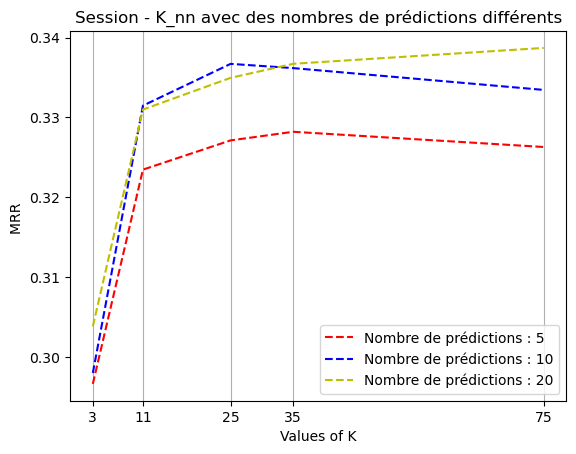

In [12]:
k_values = [3, 11, 25, 35, 75]
prediction_numbers = [5,10,20]
scores = [[],[],[]]
count_p = 0
data_train_fine, _, _ = data_manip.train_test_split(data_train, 80000, None)
for p_numbers in prediction_numbers:
    
    for k in k_values:

        knn = Knn(k, max_item + 1, p_numbers)

        count = 0
        train_acc, valid_acc = 0, 0
        for train_d, train_t in data_manip.kFold_split(data_train_fine, 5):
            print(f"train_d size : {train_d.shape}")
            print(f"train_t size : {train_t.shape}")
            knn.fit(train_d)
            print(f"knn k : {knn._k}")

            test_set, test_target = data_manip.prepare_data_for_test(train_t)
            y_hat = knn.predict(test_set)
            valid_acc += mean_reciprocal_rank(y_hat, test_target)
            # valid_acc += knn.mrr_score(test_set, test_target)
            count += 1
        scores[count_p].append(valid_acc/count)
    count_p += 1

fig = pyplot.figure()
ax = fig.add_subplot(111)

ax.set_title('Session - K_nn avec des nombres de prédictions différents')  # À modifier / to be modified
ax.plot(k_values, scores[0], 'r--', label=f"Nombre de prédictions : {prediction_numbers[0]}") # À compléter / to be completed
ax.plot(k_values, scores[1], 'b--', label=f"Nombre de prédictions : {prediction_numbers[1]}") # À compléter / to be completed
ax.plot(k_values, scores[2], 'y--', label=f"Nombre de prédictions : {prediction_numbers[2]}")
ax.set_xticks(k_values, k_values)
ax.grid(axis='x')
ax.set_xlabel("Values of K")
ax.set_ylabel("MRR ")
pyplot.legend()
pyplot.show()

In [3]:
knn = Knn(75, max_item + 1, 20)
knn.fit(data_train)

test_set, test_target = data_manip.prepare_data_for_test(data_test)
y_hat = knn.predict(test_set)
mrr_20 = mean_reciprocal_rank(y_hat, test_target)
print(f"Mrr 20 : {mrr_20}")
hit_1 = hit_rate(y_hat, test_target, 1)
hit_3 = hit_rate(y_hat, test_target, 3)
hit_5 = hit_rate(y_hat, test_target, 5)
print(f"hit_1 : {hit_1}")
print(f"hit_3 : {hit_3}")
print(f"hit_5 : {hit_5}")


  0%|          | 0/601702 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/200568 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/200568 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't suppl

MemoryError: Unable to allocate 4.59 MiB for an array with shape (601702,) and data type int64

In [3]:
predictors = [Knn(5, max_item + 1, 20)]
# training_size = [10000, 200000, 500000, 1000000]
training_size = [10000, 50000, 10000, 200000, 300000]
accuracy = dict()
mrr_accuracy = dict()
time_perf_train = []
time_perf_test = dict()
k_values = [3, 5, 10, 15, 20, 30, 50, 100]
test_size = 10000

# max_item = np.max(pd.unique(data["ItemId"]))
# prd._max_item_id = max_item + 1

for prd in predictors:
    for train_size in training_size:
        print(data_train.shape)
        train_set, test_set ,train_size= data_manip.train_test_split(data_train,train_size, test_size)
        mrr_accuracy[train_size] = []

        t0 = time.time()
        prd.fit(train_set)
        time_perf_train.append(time.time() - t0)
        test_set, test_target = data_manip.prepare_data_for_test(test_set)
        for k in k_values:
            prd._k = k
            predicted = prd.predict(test_set)
            mrr_accuracy[train_size].append(mean_reciprocal_rank(predicted, test_target))

pyplot.figure()
for size in training_size:
    pyplot.plot(k_values, mrr_accuracy[size], label=f"t_size={size}")
pyplot.xlabel("k")
pyplot.ylabel("Accuracy")
pyplot.legend()
pyplot.show()

pyplot.figure()
pyplot.plot(training_size, time_perf_train, label="time of train")
pyplot.xlabel('train session size')
pyplot.ylabel('time')
pyplot.legend()
pyplot.show()


(3163163, 3)
train size was modified real train session size is 10000


6001it [00:03, 1694.80it/s]


KeyboardInterrupt: 